In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from features import features
import pickle

In [62]:
train = pd.read_csv("Cas13designGuidePredictorInput.csv")
train = train[['normCS', 'MFE','DR','Gquad','Log10_Unpaired','hybMFE_3.12','hybMFE_15.9' ,
             'NTdens_max_A','NTdens_max_C','NTdens_max_G','NTdens_max_T','NTdens_max_AT' , 'NTdens_max_GC',
             'NTdens_min_A' ,  'NTdens_min_C' ,  'NTdens_min_G' ,  'NTdens_min_T' , 'NTdens_min_AT' ,
             'pA','pC','pG',
             'pAA','pAC','pAG','pAT','pCA','pCC','pCG','pCT','pGA','pGC','pGG','pGT','pTA','pTC','pTG']]
train = train[features]
train = train.dropna()

# train.to_csv("train.csv", index=False)
# train.head()

In [63]:
train_np = train.to_numpy()
X, y = train_np[:, 1:], train_np[:, 0]

scaler = StandardScaler()
# pca = PCA(n_components=25)

# y = scaler.fit_transform(y.reshape(-1, 1))
# y = y.flatten()

X = scaler.fit_transform(X)
# X = pca.fit_transform(X)

# from matplotlib import pyplot as plt
# dat = [sum(pca.explained_variance_ratio_[:i + 1]) for i in range(len(pca.explained_variance_ratio_))]
# plt.plot(dat)

pickle.dump(scaler, open("models/scaler.pkl","wb"))
# pickle.dump(pca, open("models/pca.pkl","wb"))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42);

In [64]:
from sklearn import svm
from sklearn import linear_model
from sklearn import neural_network
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

In [65]:
models = {
    "Support vector machine": svm.SVR(),
#     "Multilayer perceptron": neural_network.MLPRegressor(max_iter=1000),
    "Random forest": ensemble.RandomForestRegressor(),
#     "Adaboost": ensemble.AdaBoostRegressor(),
#     "Gradient boosted trees": ensemble.GradientBoostingRegressor(),
#     "XGBoost": xgb.sklearn.XGBModel(),
}

In [66]:
results = {}
for model_name, model in models.items():
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    metrics = {metric: [] for metric in ["mse", "mae", "rscore"]}
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)

        metrics["mse"].append(mean_squared_error(y_test, y_pred_test))
        metrics["mae"].append(mean_absolute_error(y_test, y_pred_test))
        metrics["rscore"].append(r2_score(y_test, y_pred_test))
        
    mse = np.mean(np.array(metrics["mse"]))
    mae = np.mean(np.array(metrics["mae"]))
    rscore = np.mean(np.array(metrics["rscore"]))
    
    print(f"Name: {model_name}, MSE: {mse}, MAE: {mae}, R-score: {rscore}")
    
    metrics["mse"] = np.mean(np.array(metrics["mse"]))
    metrics["mae"] = np.mean(np.array(metrics["mae"]))
    metrics["rscore"] = np.mean(np.array(metrics["rscore"]))
    
    results[model_name] = metrics

Name: Support vector machine, MSE: 0.17276622302323713, MAE: 0.3127808678679317, R-score: 0.45741420406403216
Name: Multilayer perceptron, MSE: 0.2128444276436367, MAE: 0.35735444494013086, R-score: 0.32996392605923563
Name: Random forest, MSE: 0.17760038514355994, MAE: 0.32052004675381046, R-score: 0.4415933985514501
Name: Adaboost, MSE: 0.23309791190988172, MAE: 0.38947059413802887, R-score: 0.26663188844087193
Name: Gradient boosted trees, MSE: 0.18918075385724692, MAE: 0.33345907720310614, R-score: 0.40522199408019166
Name: XGBoost, MSE: 0.18412542126642645, MAE: 0.327624744157006, R-score: 0.42117278578030126


In [67]:
%matplotlib inline
from matplotlib import pyplot as plt

In [68]:
# with open("resultsdump.tsv", 'w+') as wopen:
#     for model in results.keys():
#         for metric in ["mse", "mae", "rscore"]:
#             for value in results[model][metric]:
#                 wopen.write(f"{model}\t{metric}\t{value}\n")

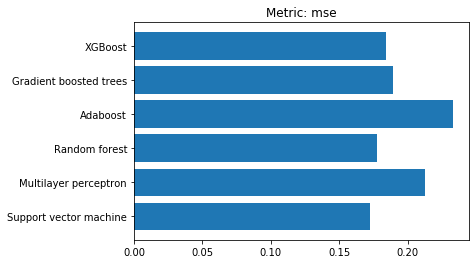

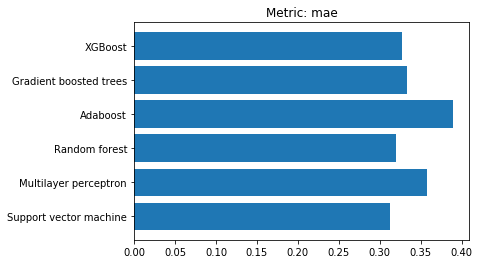

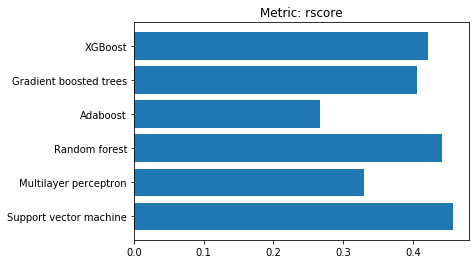

In [69]:
mymodels = list(results.keys())
for metric in ["mse", "mae", "rscore"]:
    values = [results[model][metric] for model in mymodels]
    plt.figure()
    plt.barh(mymodels, values)
    plt.title(f"Metric: {metric}")
#     plt.savefig(f"models/{metric}.png",bbox_inches='tight')
    plt.show()
    

In [70]:
model = svm.SVR().fit(X, y)
pickle.dump(model, open("models/svm.pkl","wb"))

In [71]:
pickle.dump(results, open("models/results.pkl","wb"))

In [72]:
# for model_name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred_test = model.predict(X_test)
    
#     mse = mean_squared_error(y_test, y_pred_test)
#     mae = mean_absolute_error(y_test, y_pred_test)
#     rscore = r2_score(y_test, y_pred_test)
    
#     print(f"Name: {model_name}, MSE: {mse}, MAE: {mae}, R-score: {rscore}")